# Checking apply speciation on time series

* Divide the time series into cluster --> here we can either let the number of species be a hyper-parameter or we can tune it

* Efficiently find nearest neighbors or calculate a distance/similary of a timeseries. Only let a timeseries mate with nearest neighbors or with a similarity higher than a certain threshold

In [1]:
import time
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from tslearn.clustering import KShape, GlobalAlignmentKernelKMeans, TimeSeriesKMeans, silhouette_score

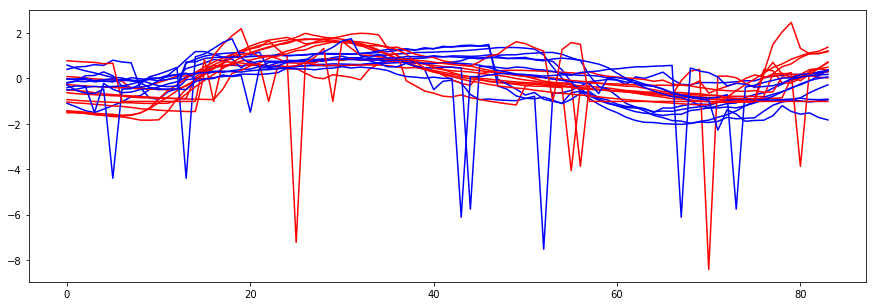

In [2]:
data = pd.read_csv('/home/giles/Projects/pyShapelets/pyshapelets/data/partitioned/MoteStrain/MoteStrain_train.csv')

X = data.drop('target', axis=1)
y = data['target']
cmap = {1: 'r', 2: 'b', 3: 'g', 4: 'y', 5: 'm'}
plt.figure(figsize=(15, 5))
for ts, label in zip(X.values, y):
    plt.plot(range(len(ts)), ts, c=cmap[label])
plt.show()

35.806 --> 35.806 --> 
GAK-means took 0.3421187400817871s


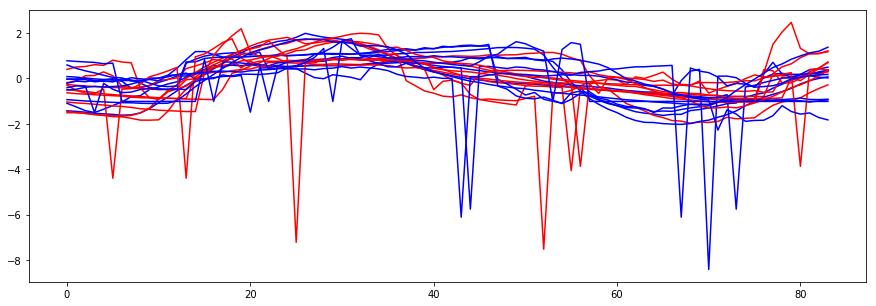

53.012 --> 38.047 --> 37.036 --> 37.036 --> 
TSK-means took 0.015520334243774414s


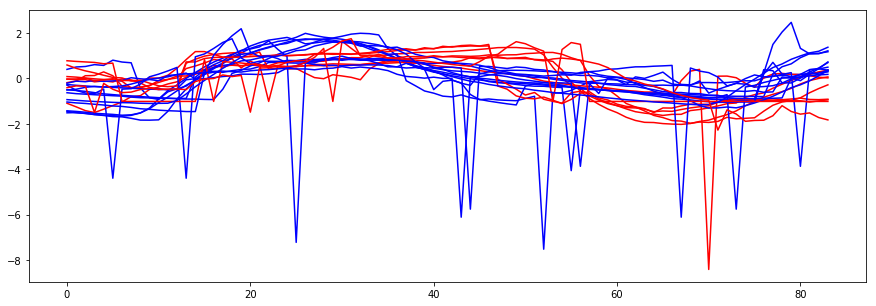

9614.318 --> 10449.114 --> 10508.558 --> 10586.795 --> 10588.689 --> 10586.991 --> 10588.875 --> 10588.248 --> 10589.053 --> 10588.411 --> 10588.859 --> 10587.856 --> 10587.918 --> 10585.361 --> 10583.800 --> 10580.244 --> 10579.387 --> 10578.503 --> 10578.527 --> 10578.292 --> 10578.390 --> 10578.232 --> 10578.299 --> 10578.180 --> 10578.222 --> 10578.135 --> 10578.162 --> 10578.100 --> 10578.116 --> 10578.073 --> 10578.082 --> 10578.051 --> 10578.056 --> 10578.035 --> 10578.030 --> 10578.023 --> 10578.019 --> 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-c5f435cb77fa>", line 11, in <module>
    labels = algorithm.fit_predict(X.values)
  File "/usr/local/lib/python3.6/dist-packages/tslearn/clustering.py", line 580, in fit_predict
    return self.fit(X, y).labels_
  File "/usr/local/lib/python3.6/dist-packages/tslearn/clustering.py", line 553, in fit
    self._fit_one_init(X_, x_squared_norms, rs)
  File "/usr/local/lib/python3.6/dist-packages/tslearn/clustering.py", line 484, in _fit_one_init
    self._update_centroids(X)
  File "/usr/local/lib/python3.6/dist-packages/tslearn/clustering.py", line 525, in _update_centroids
    init=self.cluster_centers_[k]).fit(X[self.labels_ == k])
  File "/usr/local/lib/python3.6/dist-packages/tslearn/barycenters.py", line 414, in fit
    options=dict(maxiter=self.max_iter, disp=False))


KeyboardInterrupt: 

In [3]:
algorithms = [
    #('K-Shape', KShape(n_clusters=len(set(y)))),
    ('GAK-means', GlobalAlignmentKernelKMeans(n_clusters=len(set(y)))),
    ('TSK-means', TimeSeriesKMeans(n_clusters=len(set(y)))),
    #('TSK-means DTW', TimeSeriesKMeans(n_clusters=len(set(y)), metric='dtw'))
    ('TSK-means SoftDTW', TimeSeriesKMeans(n_clusters=len(set(y)), metric='softdtw'))
]

for name, algorithm in algorithms:
    start = time.time()
    labels = algorithm.fit_predict(X.values)
    print('{} took {}s'.format(name, time.time() - start))
    plt.figure(figsize=(15, 5))
    for ts, label in zip(X.values, labels):
        plt.plot(range(len(ts)), ts, c=cmap[label + 1])
    plt.show()

In [5]:
X.shape

(20, 84)

In [18]:
from sklearn.metrics import calinski_harabaz_score, silhouette_score

silhouette_times = []
silhouette_scores = []
ch_times = []
ch_scores = []
print(len(X))
for i in range(1, 30):
    tsk = TimeSeriesKMeans(n_clusters=i)
    labels = tsk.fit_predict(X.values)
    start = time.time()
    silhouette_scores.append(silhouette_score(X.values, labels))
    silhouette_times.append(time.time() - start)
    start = time.time()
    ch_scores.append(calinski_harabaz_score(X.values, labels))
    ch_times.append(time.time() - start)
    
print('Average silhouette score time = {}s+-{}s'.format(np.mean(silhouette_times), np.std(silhouette_times)))
print('Average calinski_harabaz score time = {}s+-{}s'.format(np.mean(ch_times), np.std(ch_times)))

plt.figure(figsize=(15, 5))
plt.plot(range(len(silhouette_scores)), silhouette_scores, c='b')
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(range(len(ch_scores)), ch_scores, c='r')
plt.show()

20
120.346 --> 45.706 --> 45.706 --> 


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [19]:
silhouette_score(X, [0]*len(X))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [17]:
gak = GlobalAlignmentKernelKMeans(n_clusters=len(set(y)))

X_np = []
for ts_idx, ts in enumerate(X.values):
    if 5 < ts_idx < 15:
        X_np.append(ts[20:60])
    else:
        X_np.append(ts)
X_np = np.array(X_np)
labels = gak.fit_predict(X_np, y)
print(y, labels)
silhouette_score(X_np, labels)

35.952 --> 35.649 --> 35.649 --> 
0     2
1     2
2     1
3     1
4     1
5     2
6     2
7     1
8     2
9     1
10    1
11    2
12    2
13    1
14    1
15    2
16    1
17    1
18    2
19    2
Name: target, dtype: int64 [0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').